# Q1. 寫一個函式，抓取 Google Finance 的股價歷史資料

In [1]:
import requests
import pandas as pd
def get_price(stock,startdate):
    params = {}
    params['q'] = stock
    params['startdate'] = startdate
    url = "https://finance.google.com/finance/historical?q={q}&startdate={startdate}&output=csv".format(**params)
    stockprice=pd.read_csv(url)
    print(stockprice)

get_price('AAPL',"2016-01-01")

          Date    Open    High     Low   Close     Volume
0     1-Dec-17  169.95  171.67  168.50  171.05   39759288
1    30-Nov-17  170.43  172.14  168.44  171.85   41527218
2    29-Nov-17  172.63  172.92  167.16  169.48   41666364
3    28-Nov-17  174.30  174.87  171.86  173.07   26428802
4    27-Nov-17  175.05  175.08  173.34  174.09   20716802
5    24-Nov-17  175.10  175.50  174.65  174.97   14026673
6    22-Nov-17  173.36  175.00  173.05  174.96   25588925
7    21-Nov-17  170.78  173.70  170.78  173.14   25131295
8    20-Nov-17  170.29  170.56  169.56  169.98   16262447
9    17-Nov-17  171.04  171.39  169.64  170.15   21899544
10   16-Nov-17  171.18  171.87  170.30  171.10   23637484
11   15-Nov-17  169.97  170.32  168.38  169.08   29158070
12   14-Nov-17  173.04  173.48  171.18  171.34   24782487
13   13-Nov-17  173.50  174.50  173.40  173.97   16982080
14   10-Nov-17  175.11  175.38  174.27  174.67   25145500
15    9-Nov-17  175.11  176.10  173.14  175.88   29482596
16    8-Nov-17

# Q2. 抓取台股歷史資料，並繪製價量圖形。

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
res=requests.get("https://finance.yahoo.com/quote/2330.TW/history?period1=1483200000&period2=1512230400&interval=1d&filter=history&frequency=1d")

In [3]:
soup = bs(res.text,"lxml")
tb = soup.find_all("table",{"class":"W(100%) M(0)"})[0]
dfs = pd.read_html(tb.prettify('utf-8'), encoding='utf-8')

In [4]:
#刪除最後一行(有文字)
df=dfs[0].drop(100)
df.tail() 

,Date,Open,High,Low,Close*,Adj Close**,Volume
95,"Jul 18, 2017",213.0,214.0,212.0,214.0,214.0,18613000.0
96,"Jul 17, 2017",215.0,215.5,211.5,213.0,213.0,21372000.0
97,"Jul 14, 2017",213.0,214.5,212.0,213.0,213.0,22335000.0
98,"Jul 13, 2017",212.0,216.0,211.5,214.5,214.5,50090000.0
99,"Jul 12, 2017",211.0,212.5,210.5,210.5,210.5,26426000.0


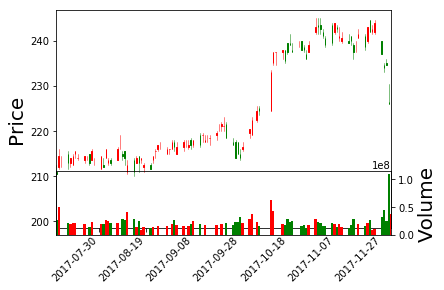

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
#from matplotlib.finance import volume_overlay3
from mpl_finance import volume_overlay3
from matplotlib.dates import num2date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import datetime

#if necessary convert to datetime
df.Date = pd.to_datetime(df.Date)

df = df[['Date', 'Open', 'High', 'Low', 'Close*', 'Volume']]
df["Date"] = df["Date"].apply(mdates.date2num)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_ylabel('Price', size=20)
candlestick_ohlc(ax, df.values, colorup='r', colordown='g')

# shift y-limits of the candlestick plot so that there is space at the bottom for the volume bar chart
pad = 0.25
yl = ax.get_ylim()
ax.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])

# create the second axis for the volume bar-plot
ax2 = ax.twinx()


# set the position of ax2 so that it is short (y2=0.32) but otherwise the same size as ax
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.1],[0.9,0.32]]))

# get data from candlesticks for a bar plot
dates = [x[0] for x in df.values]
dates = np.asarray(dates)
volume = [x[5] for x in df.values]
volume = np.asarray(volume)
# make bar plots and color differently depending on up/down for the day
pos = np.array((df['Open']-df['Close*'])<0)
neg = np.array((df['Open']-df['Close*'])>0)
ax2.bar(dates[pos],volume[pos],color='red',width=1,align='center')
ax2.bar(dates[neg],volume[neg],color='green',width=1,align='center')

#scale the x-axis tight
ax2.set_xlim(min(dates),max(dates))
# the y-ticks for the bar were too dense, keep only every third one
ax2.get_yticks()
#yticks = ax2.get_yticks()
#ax2.set_yticks(yticks[::3])


ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Volume', size=20)

# format the x-ticks with a human-readable date. 
xt = ax.get_xticks()
new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
ax.set_xticklabels(new_xticks,rotation=45, horizontalalignment='right')

plt.ion()
plt.show()